## Imports

In [7]:
import gym
from IPython.display import clear_output

import numpy as np
import random
import matplotlib.pyplot as plt
import time

## Load Taxi-v3

In [8]:
env = gym.make('Taxi-v3')

## Random Episode

In [9]:
# env.reset()
# acc_reward = 0
# for _ in range(500):
#     state, reward, done, info = env.step(env.action_space.sample())
#     clear_output(wait=True)
#     env.render()
#     acc_reward += reward
#     print('Acc Reward', acc_reward)
# env.close()

## Q-Learning

### Hyperparameters

In [39]:
alpha = 0.1 # Incremental Mean
gamma = 0.6 # Discount
epsilon = 0.1 # E-Greedy
max_episodes = int(1e4)

### Run

In [40]:
%%time
q_table = np.zeros([env.observation_space.n, env.action_space.n])
acc_rewards = []
for i in range(1, max_episodes + 1):
    state = env.reset()
    acc_reward = 0
    done = False
    while not done:
        if random.random() < epsilon: action = env.action_space.sample()
        else:                         action = np.argmax(q_table[state])
        next_state, reward, done, info = env.step(action)
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value
        
        state = next_state
        acc_reward += reward
        #clear_output(wait=True)
        #env.render()
    acc_rewards.append(acc_reward)

CPU times: user 10.3 s, sys: 10.3 ms, total: 10.3 s
Wall time: 10.3 s


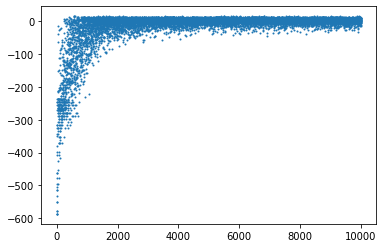

Mean -14.5673


In [41]:
plt.scatter(range(len(acc_rewards)), acc_rewards, s=1)
plt.show()
print('Mean', np.mean(acc_rewards))

### Result

In [48]:
env.reset()
acc_reward = 0
step = 0
done = False
while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)
    
    acc_reward += reward
    step += 1
    clear_output(wait=True)
    env.render()
    print('Acc Reward:', acc_reward)
    print('Step', step)
    print('Done', done)
    time.sleep(0.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Acc Reward: -200
Step 200
Done True
